# Replication of George on SpuCoMNIST Dataset

In [2]:
from os.path import split

# Import packages
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from spuco.datasets import SpuCoMNIST
from sklearn.cluster import KMeans
import numpy as np

## 1. Load and Explore SpuCoMNIST Dataset

### Install spuco package

In [5]:
# Install spuco package
%pip install spuco --upgrade;

Note: you may need to restart the kernel to use updated packages.


### Load SpuCoMNIST Dataset

In [9]:
from spuco.datasets import SpuCoMNIST, SpuriousFeatureDifficulty
import torchvision.transforms as T

classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
difficulty = SpuriousFeatureDifficulty.MAGNITUDE_LARGE

train_set = SpuCoMNIST(
    root="./data",
    spurious_feature_difficulty=difficulty,
    spurious_correlation_strength=0.995,
    classes=classes,
    split="train"
)
train_set.initialize()

test_set = SpuCoMNIST(
    root="./data",
    spurious_feature_difficulty=difficulty,
    classes=classes,
    split="test"
)
test_set.initialize()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 9.57MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 301kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.91MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.42MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Check Training and Testing Dataset Size

In [21]:
# Check the length of training and testing set
len(train_set), len(test_set)

(48004, 10000)

### Visualize Image

Image shape: torch.Size([3, 28, 28])


Text(0.5, 1.0, '0')

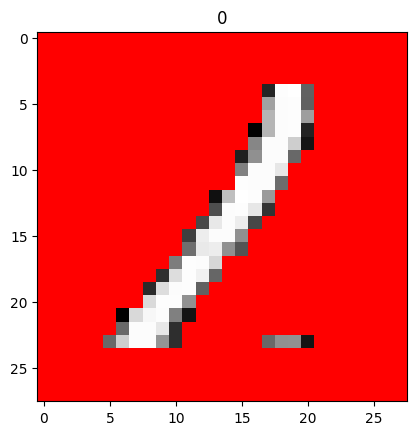

In [22]:
# Visualize MNIST data
import matplotlib.pyplot as plt

image, label = train_set[899]
print(f"Image shape: {image.shape}")

plt.imshow(image.permute(1, 2, 0)) # permute to [height, width, color_channel] for matplotlib display purpose
plt.title(label)